In [1]:
import numpy as np
import pickle

import elephant.statistics as estats
import elephant
import neo
from quantities import ms, s, Hz

from elephant.spike_train_dissimilarity import victor_purpura_distance
from elephant.spike_train_dissimilarity import van_rossum_distance

import pandas as pd
import matplotlib.pyplot as plt
from multiprocessing import Pool


In [3]:
# # for MeanDelay_noround in np.arange(2, 3.01, 0.2):
# #     MeanDelay = np.round(MeanDelay_noround,1)
# #     for stdDelay_noround in np.arange(0, 1.01, 0.05):
# #         stdDelay = np.round(stdDelay_noround,2)
# #         for n_run in np.arange(0, 10, 1):

                        
# def get_data(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay):
#     CellType = "point"
#     result_lst = []
#     for n_run in np.arange(0, 10, 1):
#         name = str(NetworkType) + '_' + str(CellType) + '_layercount' + str(n) + '_model' + str(model_id) + '_input' + str(input_idx) + '_stddelay' + str(stdDelay) + '_meandelay' + str(MeanDelay) + '_nrun' + str(n_run)
#         with open("./savedoutput_ff/" + name + ".pkl", "rb") as fp:
#             outsaved = pickle.load(fp)
#         result_lst.append(outsaved)
#     return result_lst

# def get_vp_avg(baseline, distrubed, qnum):
#     duration = 10000
#     train1 = neo.SpikeTrain(baseline * ms, t_stop=duration*ms)
#     train2 = neo.SpikeTrain(distrubed * ms, t_stop=duration*ms)
#     # q = 1.0 / (10.0 * ms) # cost factor for shifting spikes in the victor purpura distance
#     q = qnum / ms
#     tau = 10.0 * ms # time constant for the van rossum distance
#     vp_dist = victor_purpura_distance([train1, train2], q)[0, 1]
#     # vr_dist = van_rossum_distance([train1, train2], tau)[0, 1]
#     return vp_dist/ len(baseline)

# def get_devarvp_avg(baseline, distrubed, qnum, stdnum):
#     duration = 10000
#     train1 = neo.SpikeTrain(baseline * ms, t_stop=duration*ms)
#     train2 = neo.SpikeTrain(distrubed * ms, t_stop=duration*ms)
#     # q = 1.0 / (10.0 * ms) # cost factor for shifting spikes in the victor purpura distance
#     q = qnum / ms
#     tau = 10.0 * ms # time constant for the van rossum distance
#     vp_dist = victor_purpura_distance([train1, train2], q)[0, 1]
#     # vr_dist = van_rossum_distance([train1, train2], tau)[0, 1]
#     return (vp_dist - qnum * len(baseline) * stdnum * np.sqrt(2/np.pi)) / len(baseline)

# def get_vp(baseline, distrubed, qnum):
#     duration = 10000
#     train1 = neo.SpikeTrain(baseline * ms, t_stop=duration*ms)
#     train2 = neo.SpikeTrain(distrubed * ms, t_stop=duration*ms)
#     # q = 1.0 / (10.0 * ms) # cost factor for shifting spikes in the victor purpura distance
#     q = qnum / ms
#     tau = 10.0 * ms # time constant for the van rossum distance
#     vp_dist = victor_purpura_distance([train1, train2], q)[0, 1]
#     # vr_dist = van_rossum_distance([train1, train2], tau)[0, 1]
#     return vp_dist

# def get_devarvp(baseline, distrubed, qnum, stdnum):
#     duration = 10000
#     train1 = neo.SpikeTrain(baseline * ms, t_stop=duration*ms)
#     train2 = neo.SpikeTrain(distrubed * ms, t_stop=duration*ms)
#     # q = 1.0 / (10.0 * ms) # cost factor for shifting spikes in the victor purpura distance
#     q = qnum / ms
#     tau = 10.0 * ms # time constant for the van rossum distance
#     vp_dist = victor_purpura_distance([train1, train2], q)[0, 1]
#     # vr_dist = van_rossum_distance([train1, train2], tau)[0, 1]
#     return (vp_dist - qnum * len(baseline) * stdnum * np.sqrt(2/np.pi))


# def cal_VPbyStd(n, MeanDelay, qnum, model_id, input_idx):
#     baseline_res = get_data('FeedForward', n, model_id, input_idx, MeanDelay, 0.0)
#     std_res_dict = {}
#     for stdDelay_noround in np.arange(0.0, 1.01, 0.05):
#             stdDelay = np.round(stdDelay_noround,2)
#             std_res_dict[str(stdDelay)] = get_data('FeedForward', n, model_id, input_idx, MeanDelay, stdDelay)
            
#     vp_bylayerstd = []
#     devarvp_bylayerstd = []
#     vpavg_bylayerstd = []
#     devarvpavg_bylayerstd = []
#     for layer_n in range(20):
#         vp_bystd = []
#         devarvp_bystd = []
#         vpavg_bystd = []
#         devarvpavg_bystd = []
#         for stdDelay_noround in np.arange(0.0, 1.01, 0.05):
#             stdDelay = np.round(stdDelay_noround,2)
#             vp_lst = []
#             vpavg_lst = []
#             devarvp_lst = []
#             devarvpavg_lst = []
#             for n_run in np.arange(0, 10, 1):
#                 for cell_idx in range(n):
#                     baseline = baseline_res[n_run][cell_idx]
#                     distrubed = std_res_dict[str(stdDelay)][n_run][layer_n * n + cell_idx]
#                     # print(baseline_dickey, distrubed_dickey)
#                     vp_lst.append(get_vp(baseline, distrubed, qnum))
#                     devarvp_lst.append(get_devarvp(baseline, distrubed, qnum, stdDelay))
#                     vpavg_lst.append(get_vp_avg(baseline, distrubed, qnum))
#                     devarvp_bystd.append(get_devarvp_avg(baseline, distrubed, qnum, stdDelay))
#             vp_bystd.append(np.mean(vp_lst))
#             devarvp_bystd.append(np.mean(devarvp_lst))
#             vpavg_bystd.append(np.mean(vpavg_lst))
#             devarvpavg_bystd.append(np.mean(devarvpavg_lst))
#         vp_bylayerstd.append(vp_bystd)
#         devarvp_bylayerstd.append(devarvp_bystd)
#         vpavg_bylayerstd.append(vpavg_bystd)
#         devarvpavg_bylayerstd.append(devarvpavg_bystd)
#     return vp_bylayerstd, devarvp_bylayerstd, vpavg_bylayerstd, devarvpavg_bylayerstd

# # def cal_VPbyStd_singleparam(param):
# #     return cal_VPbyStd(param['nlevel'], param['n'], param['MeanDelay'], param['qnum'])

In [4]:
# get_data('FeedForward', 30, 0, 0, 2.8, 0.1)
# test_vp_bylayerstd, test_devarvp_bylayerstd, test_vpavg_bylayerstd, test_devarvpavg_bylayerstd=  cal_VPbyStd(30, 2.8, 0.1, 0, 0)

In [5]:
# test_vp_bylayerstd[3]

In [7]:
# for model_id in range(10):
#     for input_id in range(10):
#         for MeanDelay_noround in np.arange(2, 3.01, 0.2):
#             MeanDelay = np.round(MeanDelay_noround,1)
#             test_vp_bylayerstd, test_devarvp_bylayerstd, test_vpavg_bylayerstd, test_devarvpavg_bylayerstd=  cal_VPbyStd(30, MeanDelay, 0.1, model_id, input_id)
#             with open( './vpdist/'+"Mean"+ str(MeanDelay) + '_modelid' + str(model_id) +  '_inputid' + str(model_id) + '_input' + str(input_id) + '_' + 'vp.pkl', 'wb') as outp:
#                 pickle.dump(test_vp_bylayerstd, outp, pickle.HIGHEST_PROTOCOL)
#             with open( './vpdist/'+"Mean"+ str(MeanDelay) + '_modelid' + str(model_id) +  '_inputid' + str(model_id) + '_input' + str(input_id) + '_' + 'devarvp.pkl', 'wb') as outp:
#                 pickle.dump(test_devarvp_bylayerstd, outp, pickle.HIGHEST_PROTOCOL)
#             with open( './vpdist/'+"Mean"+ str(MeanDelay) + '_modelid' + str(model_id) +  '_inputid' + str(model_id) + '_input' + str(input_id) + '_' + 'vp_avg.pkl', 'wb') as outp:
#                 pickle.dump(test_vpavg_bylayerstd, outp, pickle.HIGHEST_PROTOCOL)
#             with open( './vpdist/'+"Mean"+ str(MeanDelay) + '_modelid' + str(model_id) +  '_inputid' + str(model_id) + '_input' + str(input_id) + '_' + 'devarvp_avg.pkl', 'wb') as outp:
#                 pickle.dump(test_devarvpavg_bylayerstd, outp, pickle.HIGHEST_PROTOCOL) 

In [16]:
output[19]

[323.6570833335837,
 323.9493000001948,
 323.7585250002409,
 323.9756250002159,
 324.0894000002435,
 324.36447500021325,
 323.6863333335408,
 324.7283083335469,
 324.67804166691116,
 323.80296666689384,
 325.0306000002342,
 324.4441750001923,
 325.09658333356043,
 325.2598500002506,
 325.061291666905,
 324.4387000002591,
 324.8859333335849,
 325.95949166687615,
 326.37590833354005,
 326.3284333335583,
 326.5306083335346]

2.0


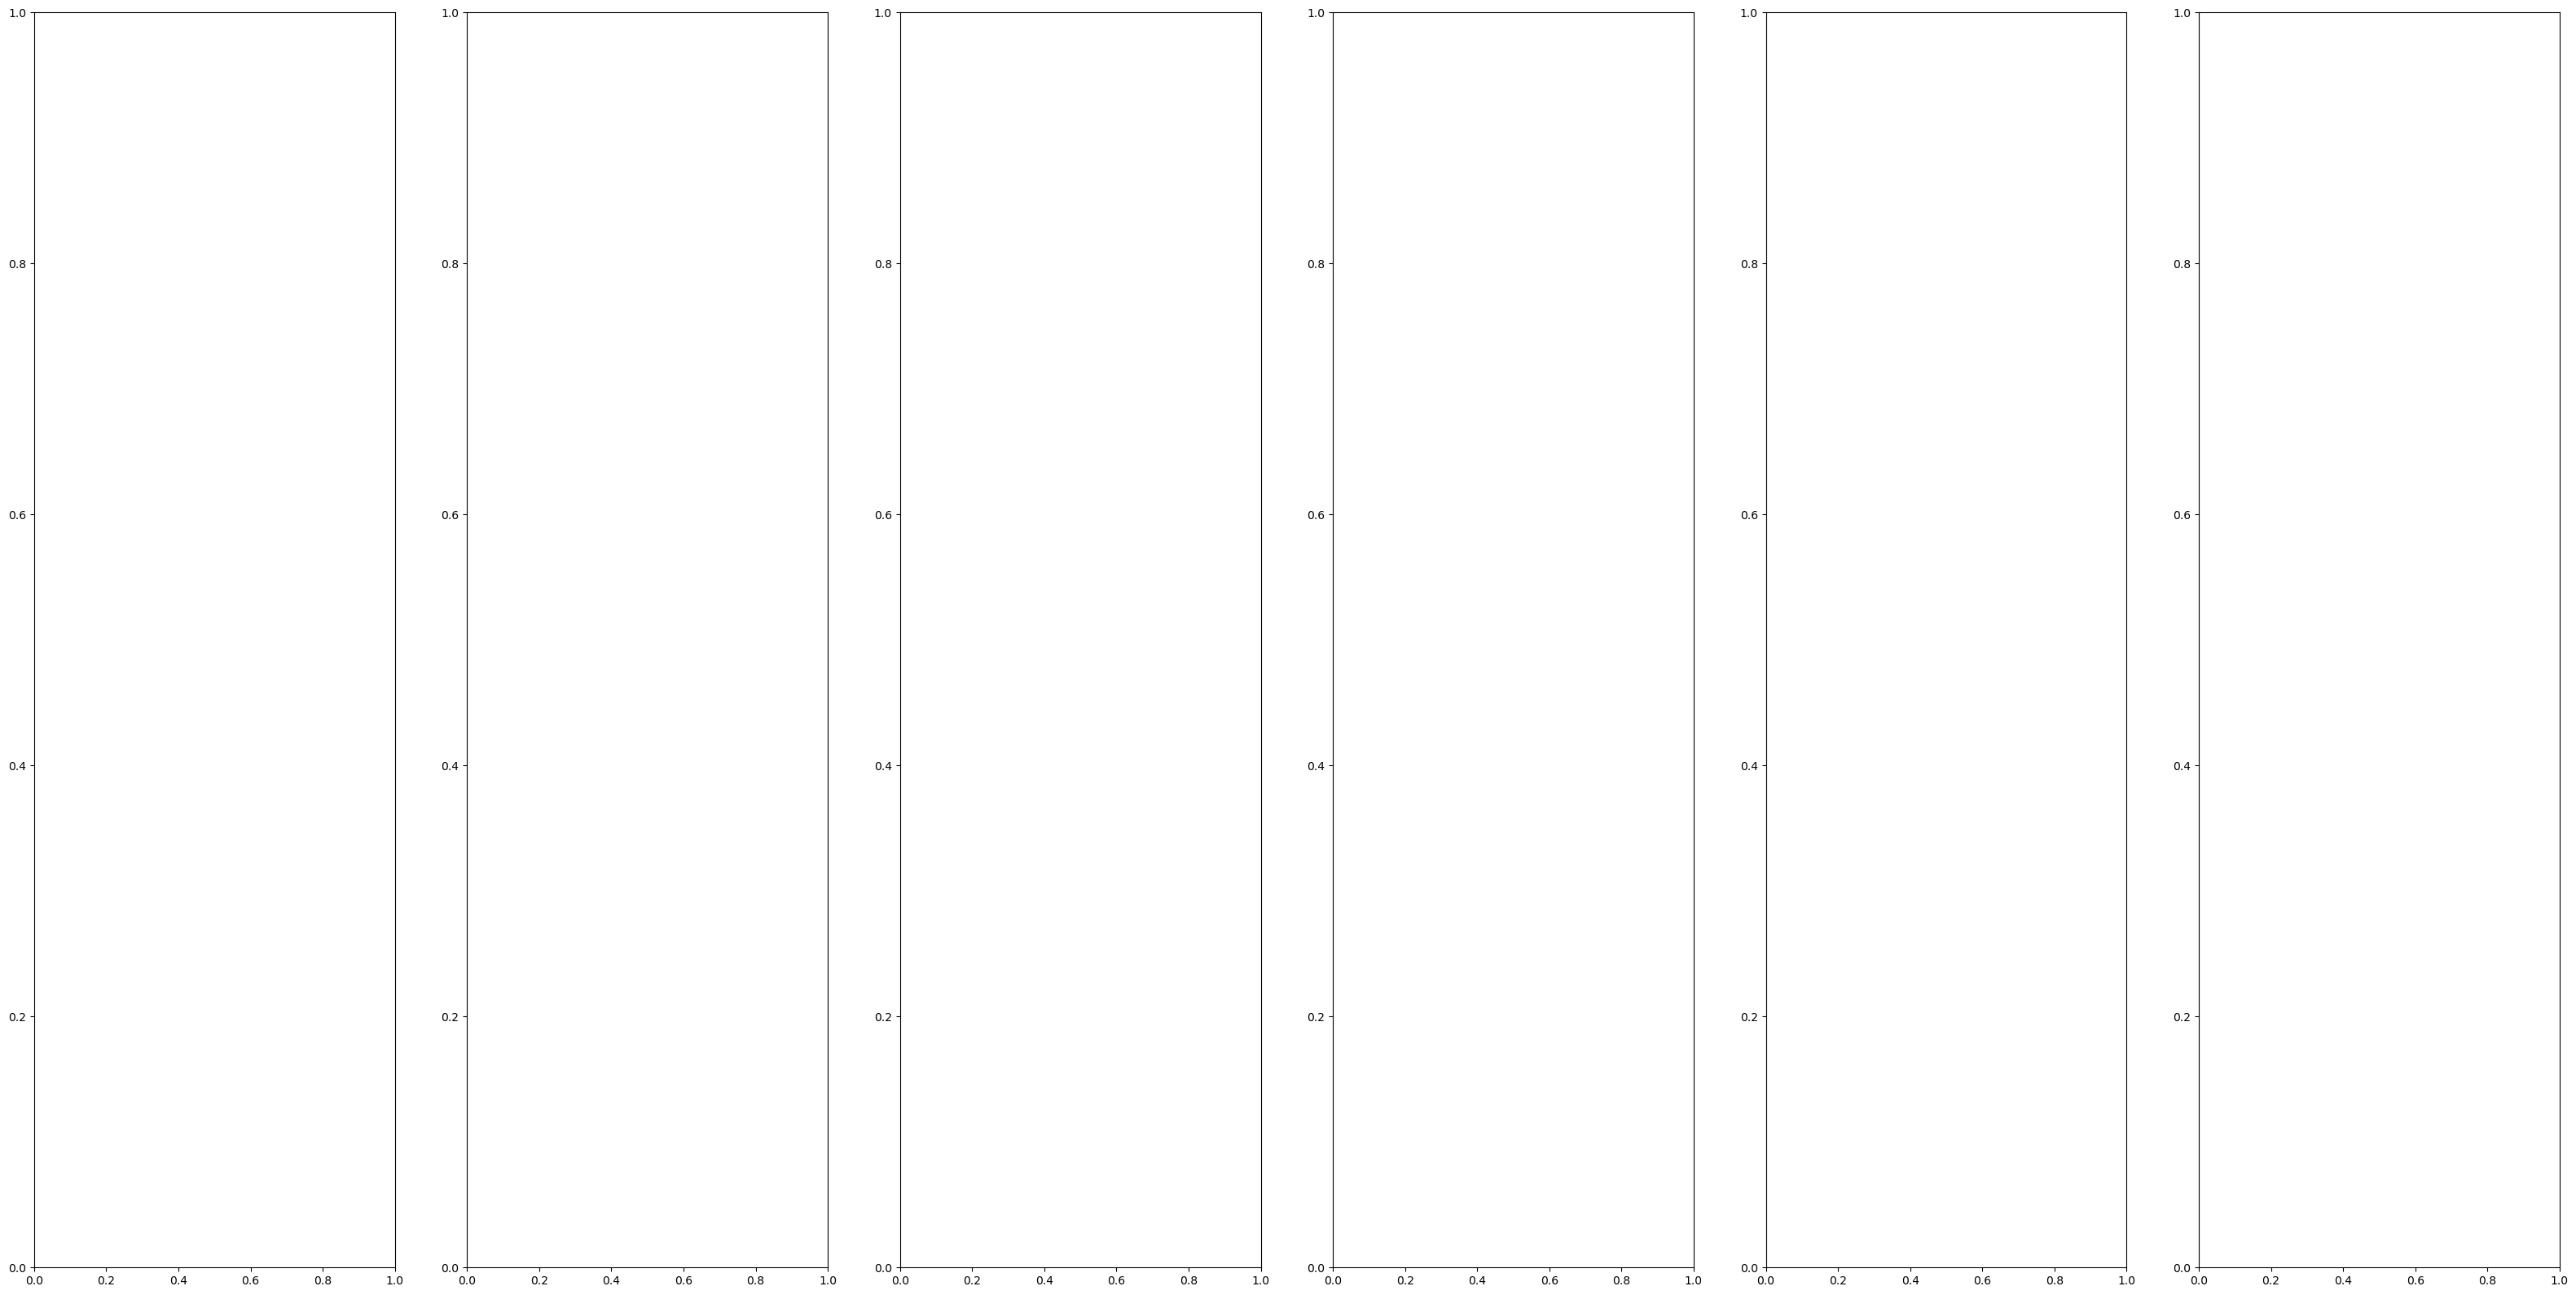

In [14]:
fig, axs = plt.subplots(1, 6, figsize=(40, 20))
model_id = 0
input_id = 0

std_delay_lst = []
for stdDelay_noround in np.arange(0.0, 1.01, 0.05):
    stdDelay = np.round(stdDelay_noround,2)
    std_delay_lst.append(stdDelay)


for MeanDelay_noround in np.arange(2, 3.01, 0.2):
    MeanDelay = np.round(MeanDelay_noround,1)
    with open( './vpdist/'+"Mean"+ str(MeanDelay) + '_modelid' + str(model_id) +  '_inputid' + str(model_id) + '_input' + str(input_id) + '_' + 'vp.pkl','rb') as inp:
        print(MeanDelay)
        output = pickle.load(inp)
        break
        counter = 0
        for layer in range(20):
            axs[counter].plot(std_delay_lst, y)
            axs[counter].set_title('{} cells/layer,MeanDelay {}'.format(2 * n, MeanDelay))
            axs[counter].legend()
            counter +=1

In [ ]:
nlevel_lst = []
n_lst = []
MeanDelay_lst = []
qnum_lst = []
param_lst = []

vp_lst = []
devarVP_lst = []

n = 30
for nlevel in np.arange(1, 20):
    for MeanDelay_noround in np.arange(2, 3.01, 0.2):
            for qnum in [0, 0.1, 0.01, 0.001]:
                MeanDelay = np.round(MeanDelay_noround,1)
                print(nlevel, n, MeanDelay)
                nlevel_lst.append(nlevel)
                n_lst.append(n)
                MeanDelay_lst.append(MeanDelay)
                qnum_lst.append(qnum)
                param_lst.append({'nlevel':nlevel , 'n':n , 'MeanDelay':MeanDelay , 'qnum':qnum})
                
                vpp = cal_VPbyStd(nlevel, n, MeanDelay, qnum)
                vp_lst.append(vpp[0])
                devarVP_lst.append(vpp[1])
         


In [9]:

df = pd.DataFrame(list(zip(nlevel_lst, n_lst, MeanDelay_lst, qnum_lst, vp_lst, devarVP_lst)),
               columns =['nlevel', 'n', 'MeanDelay', 'qnum','vpbystd', 'devarVPbyStd'])

In [10]:
df.to_pickle("VPbyStd_avg.pkl")
df = pd.read_pickle('VPbyStd_avg.pkl')

In [11]:
std_delay_lst = []
for stdDelay_noround in np.arange(0.0, 1.01, 0.05):
        stdDelay = np.round(stdDelay_noround,2)
        std_delay_lst.append(stdDelay)


In [12]:
df



,nlevel,n,MeanDelay,qnum,vpbystd,devarVPbyStd
0,1,30,2.0,0.000,"[0.0, 0.013314783608313414, 0.0110302118848872...","[0.0, 0.013314783608313414, 0.0110302118848872..."
1,1,30,2.0,0.100,"[0.0, 0.12515185664622613, 0.19036237496089178...","[0.0, 0.12515185664622613, 0.19036237496089178..."
2,1,30,2.0,0.010,"[0.0, 0.06744181850988278, 0.09422455270427035...","[0.0, 0.06744181850988278, 0.09422455270427035..."
3,1,30,2.0,0.001,"[0.0, 0.0282587405430348, 0.03340999015118397,...","[0.0, 0.0282587405430348, 0.03340999015118397,..."
4,1,30,2.2,0.000,"[0.0, 0.00822457764782326, 0.00704117933723196...","[0.0, 0.00822457764782326, 0.00704117933723196..."
...,...,...,...,...,...,...
643,9,40,2.8,0.001,"[0.0, 0.416895518473107, 0.38429775903133584, ...","[0.0, 0.416895518473107, 0.38429775903133584, ..."
644,9,40,3.0,0.000,"[0.0, 0.004764300666505165, 0.0053490611159768...","[0.0, 0.004764300666505165, 0.0053490611159768..."
645,9,40,3.0,0.100,"[0.0, 0.08750237159095328, 0.10842695153131511...","[0.0, 0.08750237159095328, 0.10842695153131511..."
646,9,40,3.0,0.010,"[0.0, 0.027860422109632816, 0.0330199959004097...","[0.0, 0.027860422109632816, 0.0330199959004097..."


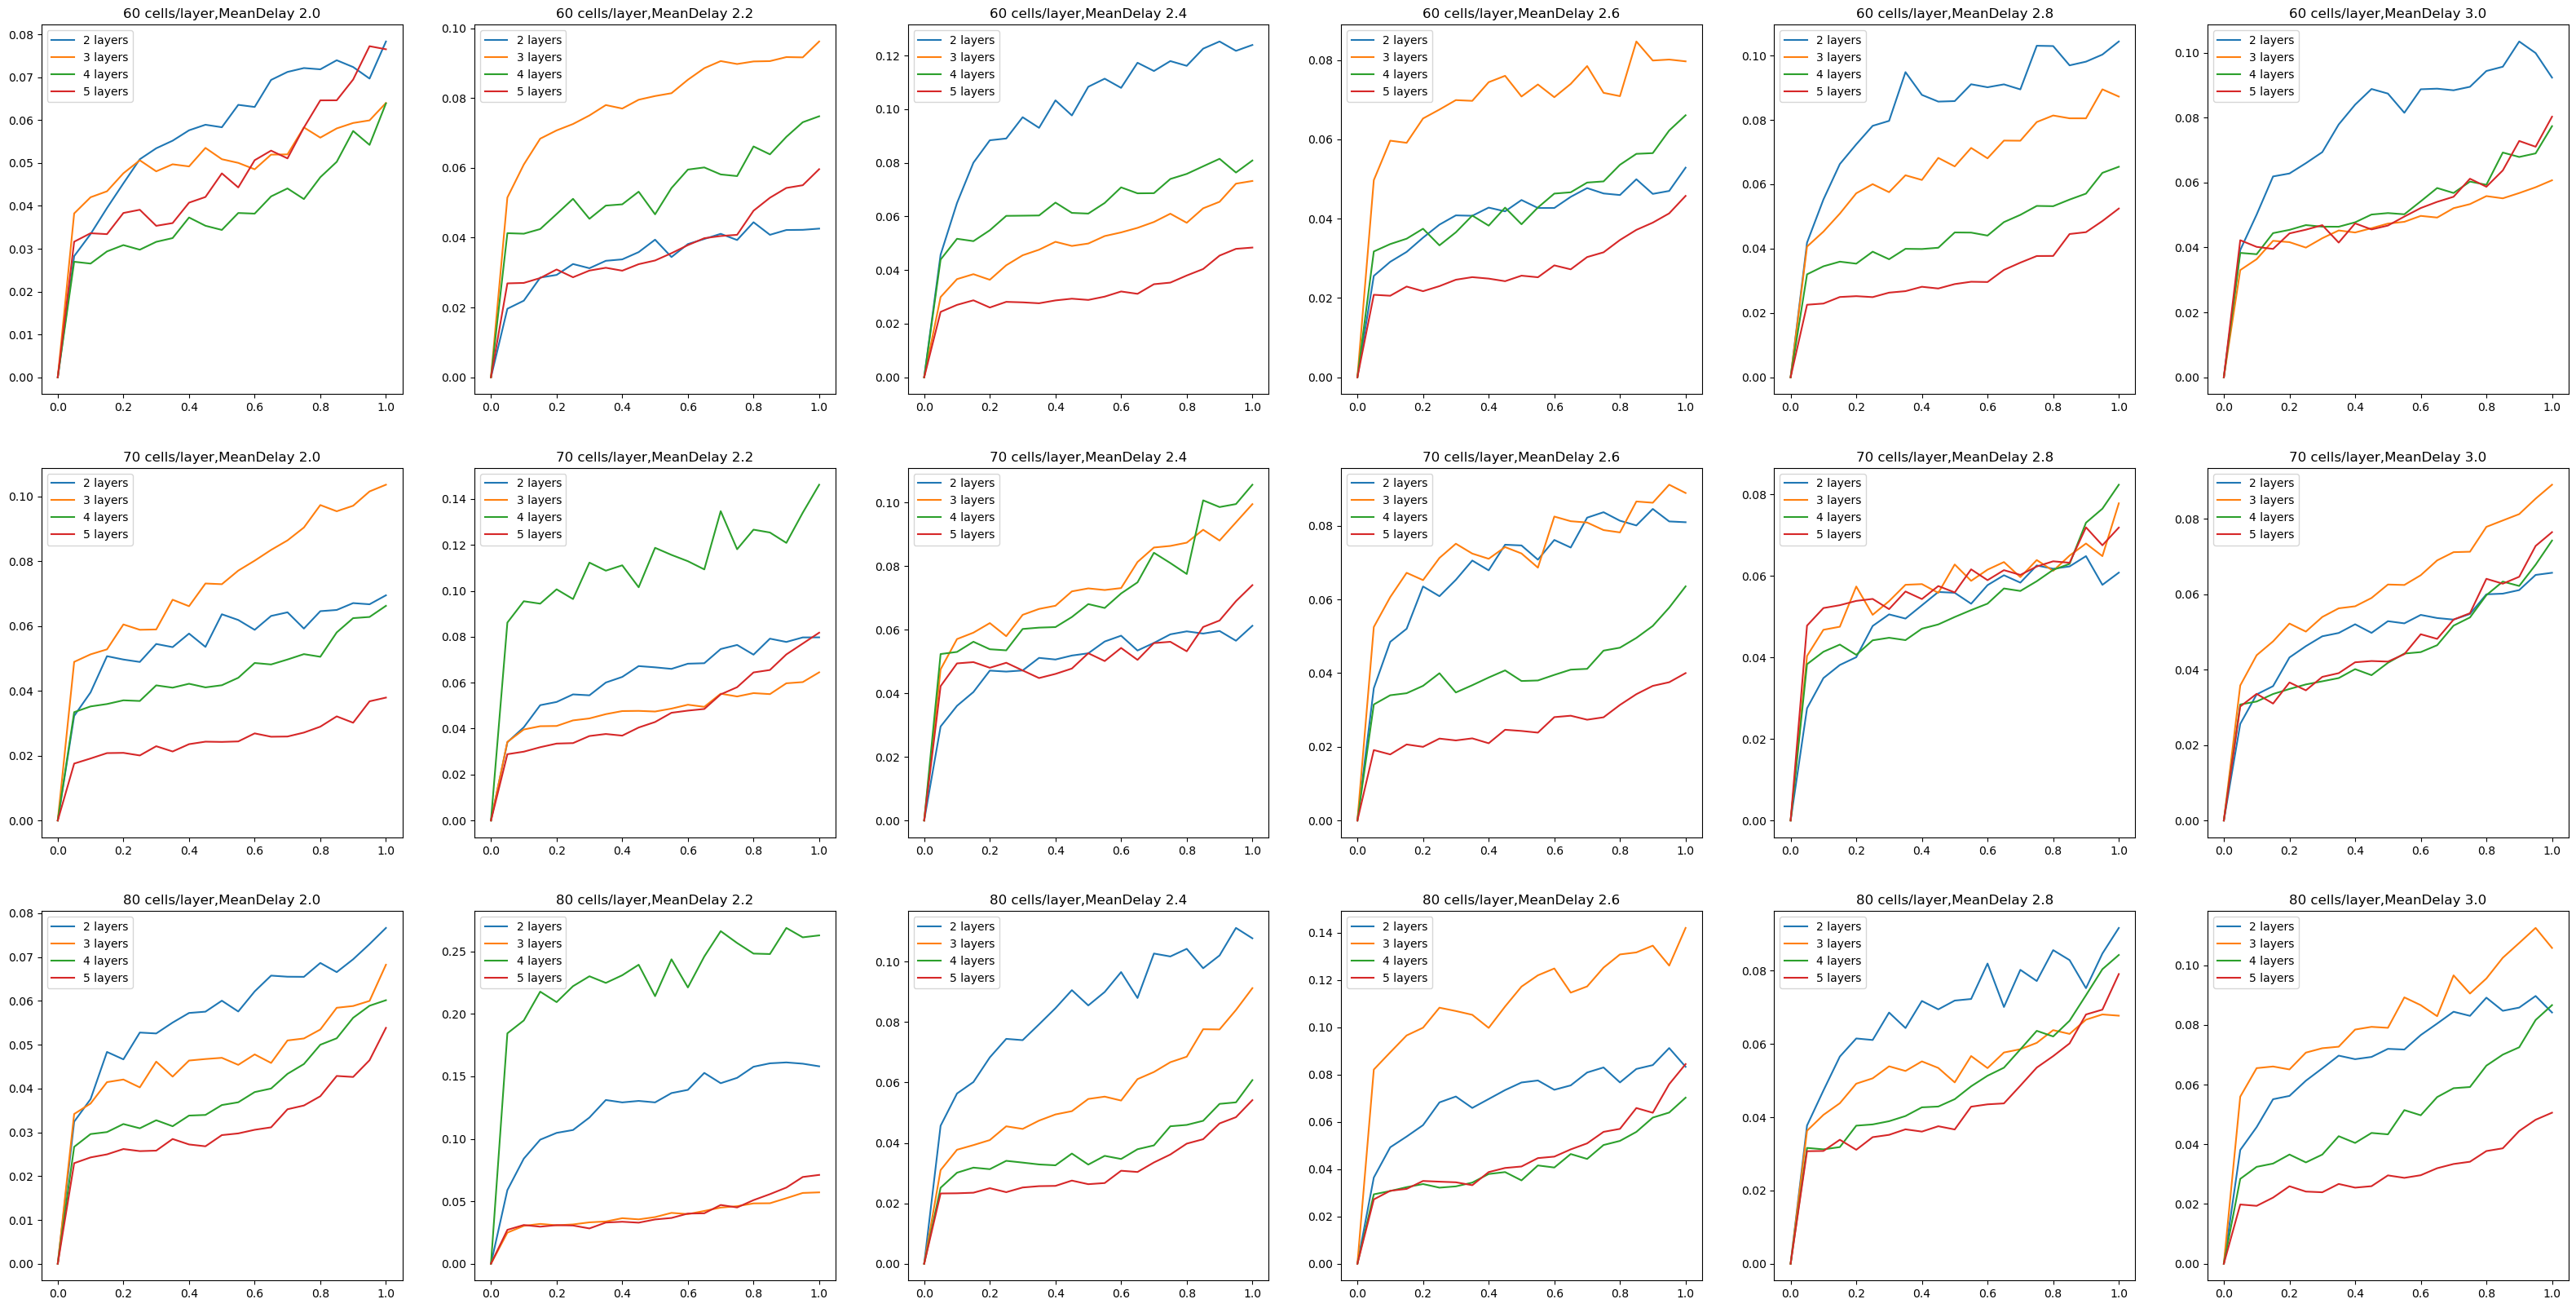

In [13]:
# for cost = 0/ms but missing is 1
fig, axs = plt.subplots(3, 6, figsize=(40, 20))
counter_i = -1
for n in np.arange(30, 41, 5):
    counter_i += 1 
    
    counter_j = -1
    for MeanDelay_noround in np.arange(2, 3.01, 0.2):
        MeanDelay = np.round(MeanDelay_noround,1)
        counter_j += 1
        for nlevel in np.arange(1, 5):
            y = df.loc[(df['nlevel'] == nlevel) & (df['n'] == n) & (df['MeanDelay'] == MeanDelay)& (df['qnum'] == 0.001), 'vpbystd'].values[0]
            axs[counter_i, counter_j].plot(std_delay_lst, y,  label=str(nlevel + 1) + ' layers')
            axs[counter_i, counter_j].set_title('{} cells/layer,MeanDelay {}'.format(2 * n, MeanDelay))
            axs[counter_i, counter_j].legend()
        